In [1]:
import numpy as np
from scipy.stats import skewnorm
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [2]:
rand_gen = np.random.default_rng(2022)

n_points = 300
noise = rand_gen.normal(size=n_points)
a = 10
x = skewnorm.rvs(a, size=n_points)
x = np.sort(x)
y_lin = x * 4 + 3 + noise
y_lin_function = x * 4 + 3
y_quad = x * x - 5 + noise
y_quad_function = x * x - 5
y_noise = noise

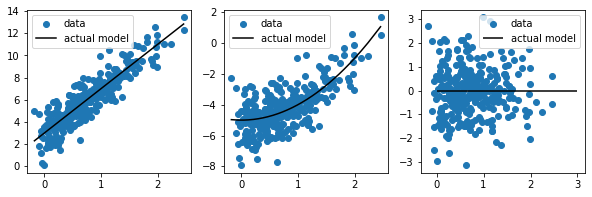

In [3]:
fig, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].scatter(x, y_lin, label='data')
ax[0].plot(x, y_lin_function, c='black', label='actual model')
ax[0].legend()
ax[1].scatter(x, y_quad, label='data')
ax[1].plot(x, y_quad_function, c='black', label='actual model')
ax[1].legend()
ax[2].scatter(x, y_noise, label='data')
ax[2].hlines(0, 0, 3, colors='black', label='actual model')
ax[2].legend();
#fig.savefig("./scatter_plots.png", dpi=300);

# Linear Fit

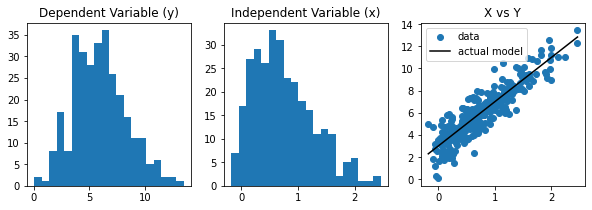

In [22]:
fig, ax = plt.subplots(1,3, figsize=(10,3))
ax[0].hist(y_lin, bins=20)
ax[0].set_title("Dependent Variable (y)");
ax[1].hist(x, bins=20)
ax[1].set_title("Independent Variable (x)");
ax[2].scatter(x, y_lin, label='data')
ax[2].plot(x, y_lin_function, c='black', label='actual model')
ax[2].set_title("X vs Y");
ax[2].legend()
fig.savefig("x_y_distributions.png", dpi=300)

In [5]:
# add a column for constant in X
X = np.column_stack(x)
X = sm.add_constant(x)

# create model
model = sm.OLS(y_lin, X)
# fit model
fit_results = model.fit()
fit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1297.
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          1.44e-110
Time:                        22:29:55   Log-Likelihood:                -433.87
No. Observations:                 300   AIC:                             871.7
Df Residuals:                     298   BIC:                             879.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9219      0.103     28.357      0.000       2.719       3.125
x1             4.0419      0.112     36.013      0.000       3.821       4.263
==============================================================================
Omnibus:                        1.146   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                0.875
Skew:                           0.090   Prob(JB):                        0.646
Kurtosis:                       3.193   Cond. No.                         3.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assess Model Assumptions from Residuals

## Normality

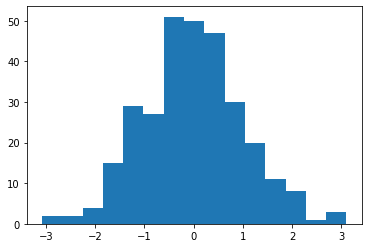

In [6]:
# get residuals and plot
residuals = fit_results.resid
plt.hist(residuals, bins=15);
plt.savefig("resid_hist.png", dpi=300)

## Homoscedasticity 

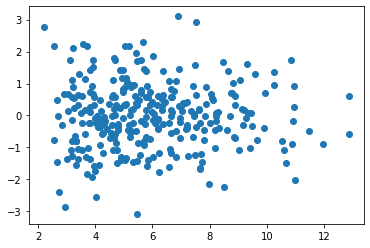

In [7]:
# get predictions and plot vs residuals
pred = fit_results.predict(X)
plt.scatter(pred, residuals);
plt.savefig("resid_scatter.png", dpi=300)

## Heteroscedasticity 

From an extreme outlier

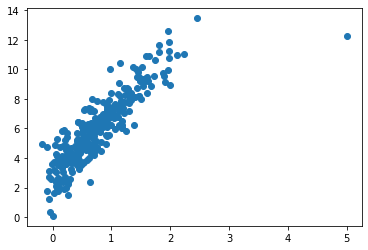

In [8]:
# add a column for constant in X
x_with_outlier = x.copy()
x_with_outlier[-1] = 5
plt.scatter(x_with_outlier, y_lin)

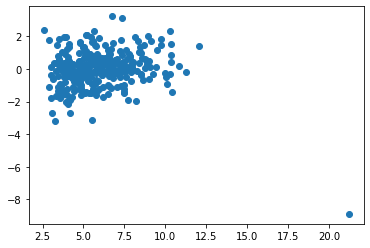

In [9]:

X = np.column_stack(x_with_outlier)
X = sm.add_constant(x_with_outlier)

# create model
model = sm.OLS(y_lin, X)
# fit model
fit_results = model.fit()

# get predictions and plot vs residuals
pred_outlier = fit_results.predict(X)
outlier_resid = fit_results.resid
plt.scatter(pred_outlier, outlier_resid);

From non-constant noise

In [10]:
# generate noise that grows in variance
prop_noise = []
for i in range(x.size):
    prop_noise.append(rand_gen.normal(0, i/20, size=1)[0])

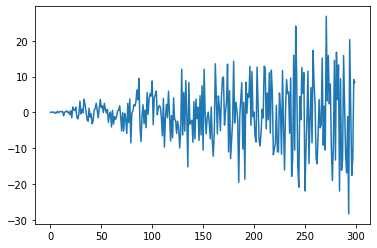

In [11]:
plt.plot(prop_noise)

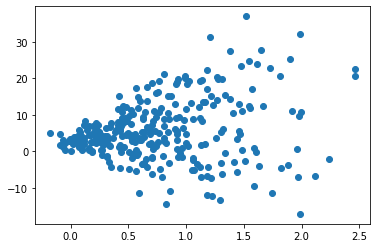

In [12]:
# scatter plot of x and y with non-constant noise
plt.scatter(x, y_lin + np.array(prop_noise))

In [13]:
# add a column for constant in X
X = np.column_stack(x)
X = sm.add_constant(x)

# create model
model = sm.OLS(y_lin + np.array(prop_noise), X)
# fit model
fit_results = model.fit()
non_const_resid = fit_results.resid

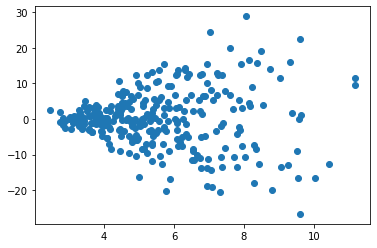

In [14]:
# get predictions and plot vs residuals
pred_non_const = fit_results.predict(X)
plt.scatter(pred_non_const, non_const_resid);

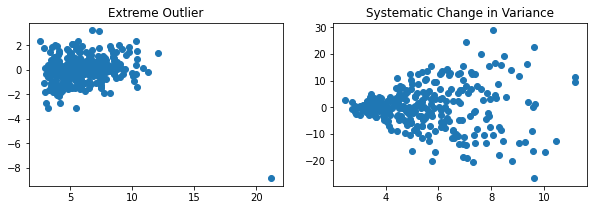

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].scatter(pred_outlier, outlier_resid);
ax[0].set_title("Extreme Outlier");
ax[1].scatter(pred_non_const, non_const_resid);
ax[1].set_title("Systematic Change in Variance");
#fig.savefig("heteroscedasticity.png", dpi=300)